In [ ]:
!pip install datasets
!pip install seqeval
!pip install transformers
!pip install bertviz

     |████████████████████████████████| 290 kB 5.2 MB/s 
     |████████████████████████████████| 243 kB 47.6 MB/s 
     |████████████████████████████████| 1.1 MB 35.3 MB/s 
     |████████████████████████████████| 59 kB 6.0 MB/s 
     |████████████████████████████████| 132 kB 46.0 MB/s 
     |████████████████████████████████| 160 kB 48.7 MB/s 
     |████████████████████████████████| 271 kB 44.3 MB/s 
     |████████████████████████████████| 192 kB 55.8 MB/s 
     |████████████████████████████████| 43 kB 1.4 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16181 sha256=f6b3ecf5381564507f45060883dedca2f29e69d009abd8c1fc45651813e25962
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval
     |████████████████████████████████| 3.1 MB 5.3 MB/s 
     |████████████████████████████████| 895 kB 39.7 MB/s 
     |████████████████████████████████| 596 kB 45.5 MB/s 
     |██████████████████

# Introduction

The PAN-X dataset consists of Wikipedia articles in many languages. Each article is annotated with LOC, PER and ORG tags in the "inside-outside-beginning" (IOB) format. The purpose of this notebook is to play around with the dataset to determine the most optimal settings for training a multilingual Named Entity Recognition (NER) engine.  

Why multilingual? 
* In production, it is not easy to maintain multiple monolingual models. 
* Multilingual transformers are able to perform zero-shot cross lingual transfer. (A model fine-tuned on one language can be applied to other languages without further training)
* Multilingual transformers perform better for code-switching where a piece of text can alternate between two or more languages.

In [ ]:
import pandas as pd
import numpy as np
import os
import torch

from datasets import load_dataset
from datasets import DatasetDict
from collections import defaultdict

device = "cuda" if torch.cuda.is_available() else "cpu"


# Dataset generation

We will partition the NER dataset according to the following proportions:  
40% english  
20% indonesian  
20% malay  
10% chinese  
5% thai  
5% vietnamese  

This would roughly follow the proportions of data found in production

In [ ]:
langs = ['en', 'id', 'ms', 'zh', 'th', 'vi']
fracs = [0.4, 0.2, 0.2, 0.1, 0.05, 0.05]

panx_ch = defaultdict(DatasetDict)

for lang, frac in zip(langs, fracs):
  ds = load_dataset("xtreme", f"PAN-X.{lang}", data_dir="data")
  for split in ds.keys():
    panx_ch[lang][split] = (ds[split].shuffle(seed=0).select(range(int(frac * ds[split].num_rows))))

Downloading:   0%|          | 0.00/9.06k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/23.1k [00:00<?, ?B/s]

Using custom data configuration PAN-X.en-data_dir=data


Downloading:   0%|          | 0.00/234M [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset xtreme downloaded and prepared to /root/.cache/huggingface/datasets/xtreme/PAN-X.en-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Using custom data configuration PAN-X.id-data_dir=data


0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset xtreme downloaded and prepared to /root/.cache/huggingface/datasets/xtreme/PAN-X.id-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Using custom data configuration PAN-X.ms-data_dir=data


0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset xtreme downloaded and prepared to /root/.cache/huggingface/datasets/xtreme/PAN-X.ms-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Using custom data configuration PAN-X.zh-data_dir=data


0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset xtreme downloaded and prepared to /root/.cache/huggingface/datasets/xtreme/PAN-X.zh-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Using custom data configuration PAN-X.th-data_dir=data


0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset xtreme downloaded and prepared to /root/.cache/huggingface/datasets/xtreme/PAN-X.th-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Using custom data configuration PAN-X.vi-data_dir=data


0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset xtreme downloaded and prepared to /root/.cache/huggingface/datasets/xtreme/PAN-X.vi-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

### Examining the data

In [ ]:
# Dataset sample split by language
pd.DataFrame({lang: [panx_ch[lang]['train'].num_rows] for lang in langs}, index=["Number of training examples"])

,en,id,ms,zh,th,vi
Number of training examples,8000,4000,4000,2000,1000,1000


In [ ]:
# Looking at a sample data point
panx_ch['en']['train'][0]

{'langs': ['en', 'en', 'en', 'en', 'en', 'en'],
 'ner_tags': [0, 0, 3, 4, 0, 0],
 'tokens': ["'", "''", 'Toronto', 'Lynx', "''", "'"]}

In [ ]:
# Looking at the dataset features
panx_ch['en']['train'].features

{'langs': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(num_classes=7, names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], names_file=None, id=None), length=-1, id=None),
 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}

The ner_tags are currently in an encoded format (required for training).   
To make the ner_tags human readable we will append an additional column ner_tags_str  

In [ ]:
tags = panx_ch['en']['train'].features['ner_tags'].feature

def create_tag_names(batch):
  return {"ner_tags_str": [tags.int2str(idx) for idx in batch['ner_tags']]}

panx_en = panx_ch['en'].map(create_tag_names)

example = panx_en['train'][0]
pd.DataFrame([example['tokens'], example['ner_tags_str']], ['Tokens', 'Tags'])

  0%|          | 0/4000 [00:00<?, ?ex/s]

  0%|          | 0/4000 [00:00<?, ?ex/s]

  0%|          | 0/8000 [00:00<?, ?ex/s]

,0,1,2,3,4,5
Tokens,','',Toronto,Lynx,'','
Tags,O,O,B-ORG,I-ORG,O,O


Calculate frequency of each NER tag, (LOC, PER, ORG) in the corpus

In [ ]:
from itertools import chain
from collections import Counter

split2freqs = {}

for split in panx_en.keys():
  tag_names = []
  for row in panx_en[split]["ner_tags_str"]:
    tag_names.append([t.split("-")[1] for t in row if t.startswith("B")])
  split2freqs[split] = Counter(chain.from_iterable(tag_names))

pd.DataFrame.from_dict(split2freqs, orient="index")

,ORG,PER,LOC
validation,1863,1832,1898
test,1880,1831,1925
train,3744,3640,3677


There is an even distribution of the different entity types across the different splits.

# Model training

For our model, we will use the bert-base-multilingual-cased model available on huggingface.  

This model was chosen over other multilingual transformers because it offers the best performance relative to model size which suits our model iteration use case the best.  

We use the cased version over the uncased version because the casing of the words would likely help the model in identifying entities

In [ ]:
# Initialize tokenizer, model and config
from transformers import AutoTokenizer, AutoModelForTokenClassification, AutoConfig

index2tag = {idx: tag for idx, tag in enumerate(tags.names)}
tag2index = {tag: idx for idx, tag in enumerate(tags.names)}


def init_model():
  model_ckpt = "bert-base-multilingual-cased"
  tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
  config = AutoConfig.from_pretrained(model_ckpt, num_labels=tags.num_classes, id2label=index2tag, label2id=tag2index)
  model = AutoModelForTokenClassification.from_pretrained(model_ckpt, config=config)
  return model, tokenizer

model, tokenizer = init_model()

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.87M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/681M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at 

### Tokenizing and encoding

When tokenizing words, the BERT tokenizer would sometimes split words into subwords. This presents a problem since our original NER labels are assigned to individual words. The original BERT paper recommends using only the first subword during training/prediction and this will be the same convention we apply.

Let's look at how a sample input looks like before being fed into the model

In [ ]:
sample = panx_en['train'].select([10])
sample = sample.map(tokenize_and_align_labels, batched=True)
decoded_tokens = [tokenizer.decode(i) for i in sample[0]['input_ids']]
labels = sample[0]['labels']
token_tags = [index2tag[i] if i in index2tag else i for i in labels]
pd.DataFrame([decoded_tokens, token_tags], ['Tokens', 'Tags'])

  0%|          | 0/1 [00:00<?, ?ba/s]

,0,1,2,3,4,5,6,7,8,9,10
Tokens,[CLS],Its,source,is,near,Mega,Der,##ei,##o,.,[SEP]
Tags,-100,O,O,O,O,B-LOC,I-LOC,-100,-100,O,-100


As above, special tokens and sub words have been assigned a -100 tag

In [ ]:
def encode_panx_dataset(corpus):
    return corpus.map(tokenize_and_align_labels, batched=True, remove_columns=['langs', 'ner_tags', 'tokens'])
panx_en_encoded = encode_panx_dataset(panx_ch['en'])

  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/8 [00:00<?, ?ba/s]

When calculating the metrics for our model, we will need to ignore the label IDs which have been assigned -100. We will create a function which will do this for us

In [ ]:
from seqeval.metrics import classification_report, f1_score

def align_predictions(predictions, label_ids):
    """ We need to ignore the label IDs associated with subsequent subwords"""
    preds = np.argmax(predictions, axis=2)
    batch_size, seq_len = preds.shape
    labels_list, preds_list = [], []
    for batch_idx in range(batch_size):
        example_labels, example_preds = [], []
        for seq_idx in range(seq_len):
            # ignore label ids with -100
            if label_ids[batch_idx, seq_idx] != -100:
                example_labels.append(index2tag[label_ids[batch_idx][seq_idx]])
                example_preds.append(index2tag[preds[batch_idx][seq_idx]])
        labels_list.append(example_labels)
        preds_list.append(example_preds)
    return preds_list, labels_list

def compute_metrics(eval_pred):
    y_pred, y_true = align_predictions(eval_pred.predictions, eval_pred.label_ids)
    return {"f1": f1_score(y_true, y_pred)}

Train the model

In [ ]:
from transformers import Trainer, TrainingArguments
from transformers import DataCollatorForTokenClassification

data_collator= DataCollatorForTokenClassification(tokenizer)

training_args = TrainingArguments(
    output_dir="./",
    save_total_limit=2,
    num_train_epochs=3,
    learning_rate=3e-5,
    lr_scheduler_type="linear",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=24,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    metric_for_best_model="f1",
    load_best_model_at_end=True
)

# Use default AdamW for optimizer
trainer = Trainer(
    model=model,
    data_collator=data_collator,
    args=training_args,
    tokenizer=tokenizer,
    train_dataset=panx_en_encoded['train'],
    eval_dataset=panx_en_encoded['validation'],
    compute_metrics=compute_metrics
)

trainer.train()

***** Running training *****
  Num examples = 8000
  Num Epochs = 3
  Instantaneous batch size per device = 4
  Total train batch size (w. parallel, distributed & accumulation) = 4
  Gradient Accumulation steps = 1
  Total optimization steps = 6000


Epoch,Training Loss,Validation Loss,F1
1,0.371100,0.375016,0.776458
2,0.261500,0.337522,0.808620
3,0.164600,0.373519,0.822682


***** Running Evaluation *****
  Num examples = 4000
  Batch size = 24
Saving model checkpoint to ./checkpoint-2000
Configuration saved in ./checkpoint-2000/config.json
Model weights saved in ./checkpoint-2000/pytorch_model.bin
tokenizer config file saved in ./checkpoint-2000/tokenizer_config.json
Special tokens file saved in ./checkpoint-2000/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 4000
  Batch size = 24
Saving model checkpoint to ./checkpoint-4000
Configuration saved in ./checkpoint-4000/config.json
Model weights saved in ./checkpoint-4000/pytorch_model.bin
tokenizer config file saved in ./checkpoint-4000/tokenizer_config.json
Special tokens file saved in ./checkpoint-4000/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 4000
  Batch size = 24
Saving model checkpoint to ./checkpoint-6000
Configuration saved in ./checkpoint-6000/config.json
Model weights saved in ./checkpoint-6000/pytorch_model.bin
tokenizer config file saved in .

TrainOutput(global_step=6000, training_loss=0.28602515665690104, metrics={'train_runtime': 1233.4343, 'train_samples_per_second': 19.458, 'train_steps_per_second': 4.864, 'total_flos': 247018256232000.0, 'train_loss': 0.28602515665690104, 'epoch': 3.0})

Model achieves an f1-score of 83% of the english validation set

In [ ]:
# Function to look at predictions
def tag_text(text, tags, model, tokenizer):
  tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(text)))
  inputs = tokenizer.encode(text, return_tensors="pt").to(device)
  outputs = model(inputs)[0]
  predictions = torch.argmax(outputs, dim=2)
  preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
  df = pd.DataFrame([tokens, preds], index=['Tokens', 'Tags'])
  return df

In [ ]:
text = "Jeffrey Preston Bezos is an American entrepreneur, media proprietor, investor, and computer engineer. He is the founder and executive chairman of Amazon, where he previously served as the president and CEO"
res = tag_text(text, tags, trainer.model, tokenizer)
res

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
Tokens,[CLS],Jeffrey,Preston,Bez,##os,is,an,American,entrepreneur,",",media,proprie,##tor,",",in,##vestor,",",and,computer,engineer,.,He,is,the,founder,and,executive,chairman,of,Amazon,",",where,he,previously,served,as,the,president,and,CEO,[SEP]
Tags,O,B-PER,I-PER,I-PER,I-PER,O,O,B-LOC,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,B-ORG,O,O,O,O,O,O,O,O,O,O,O


In [ ]:
model = model.to(device)

## Error analysis

In [ ]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
  features = [dict(zip(batch, t)) for t in zip(*batch.values())]
  batch = data_collator(features)
  input_ids = batch['input_ids'].to(device)
  attention_mask = batch['attention_mask'].to(device)
  labels = batch['labels'].to(device)

  with torch.no_grad():
    output = model(input_ids, attention_mask)
    batch['predicted_label'] = torch.argmax(output.logits, axis=-1)
  
  loss = cross_entropy(output.logits.view(-1, 7), labels.view(-1), reduction="none")
  loss = loss.view(len(input_ids), -1)
  batch['loss'] = loss

  # convert back into numpy to be stored in dataset obj
  for k, v in batch.items():
    batch[k] = v.cpu().numpy()
  
  return batch

In [ ]:
valid_set = panx_en_encoded['validation']
valid_set = valid_set.map(forward_pass_with_label, batched=True, batch_size=32)
valid_set.set_format("pandas")
df = valid_set[:]

  0%|          | 0/125 [00:00<?, ?ba/s]

Set -100 label to Ignore


In [ ]:
index2tag[-100] = "IGN"
df['input_tokens'] = df['input_ids'].apply(lambda x: tokenizer.convert_ids_to_tokens(x))
df['predicted_label'] = df['predicted_label'].apply(lambda x: [index2tag[i] for i in x])
df['labels'] = df['labels'].apply(lambda x: [index2tag[i] for i in x])

In [ ]:
df_tokens = df.apply(pd.Series.explode)
df_tokens = df_tokens.query("labels != 'IGN'")
df_tokens['loss'] = df_tokens['loss'].astype(float)

In [ ]:
(df_tokens.groupby('input_tokens')[['loss']]
 .agg(['count', 'mean', 'sum'])
 .droplevel(level=0, axis=1)
 .sort_values(by="sum", ascending=False)
 .reset_index()
 .head(20))

,input_tokens,count,mean,sum
0,",",1977,0.239213,472.924792
1,of,749,0.531503,398.095822
2,(,1039,0.351054,364.745510
3,),1033,0.348458,359.957019
4,',2210,0.100880,222.944709
5,the,627,0.327318,205.228588
6,and,408,0.315216,128.608118
7,The,188,0.511298,96.124007
8,in,498,0.167952,83.639888
9,United,56,1.113165,62.337255


The highest losses appear to come from punctuation and filler words.

In [ ]:
(
    df_tokens.groupby("labels")[["loss"]]
    .agg(["count", "mean", "sum"])
    .droplevel(level=0, axis=1)
    .sort_values(by="mean", ascending=False)
    .reset_index()
)

,labels,count,mean,sum
0,I-LOC,2558,0.926948,2371.132307
1,B-ORG,1863,0.866800,1614.848721
2,B-LOC,1898,0.671470,1274.449220
3,I-ORG,4660,0.529915,2469.402643
4,I-PER,3006,0.520139,1563.538297
5,B-PER,1832,0.445885,816.860621
6,O,16202,0.100375,1626.281087


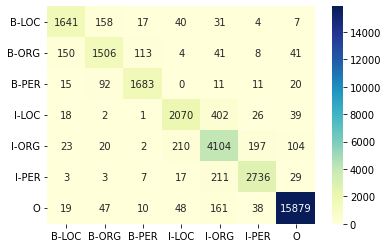

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

tag_names = ['B-LOC', 'B-ORG', 'B-PER', 'I-LOC', 'I-ORG', 'I-PER', 'O']
cm = confusion_matrix(df_tokens['labels'], df_tokens['predicted_label'])
f = sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=tag_names, yticklabels=tag_names)

In [ ]:
def display_samples(df):
  dfs = []
  for _, row in df.iterrows():
    labels, preds, tokens, losses = [], [], [], []
    for i, mask in enumerate(row["attention_mask"]):
      if mask == 1:
        labels.append(row["labels"][i])
        preds.append(row["predicted_label"][i])
        tokens.append(row["input_tokens"][i])
        losses.append(row['loss'][i])
    df_tmp = pd.DataFrame({"tokens": tokens, "labels": labels,
                            "preds": preds, "losses": losses}).T
    print(df_tmp.to_string())

df["total_loss"] = df["loss"].apply(sum)
display_samples(df.sort_values(by="total_loss", ascending=False).head(4))

           0            1            2    3        4           5        6        7      8        9        10       11       12       13       14        15       16       17           18   19           20     21
tokens  [CLS]            '            '    '   Justin  Timberlake        -   Mirror    ##s        (       US      Top       40        1        ,  February       11        )            '    '            '  [SEP]
labels    IGN            O            O  IGN    B-ORG       I-ORG    I-ORG    I-ORG    IGN    I-ORG    I-ORG    I-ORG    I-ORG    I-ORG    I-ORG     I-ORG    I-ORG    I-ORG            O  IGN            O    IGN
preds       O            O            O    O    B-PER       I-PER        O    B-ORG  I-ORG        O    B-LOC        O        O        O        O         O        O        O            O    O            O      O
losses      0  0.000282963  0.000258532    0  5.02027      5.1195  7.47089  6.23878      0  6.27135  4.50234  1.24723  1.19523  6.93053  7.77453   8.32898  

Looking at the samples, we can see that the PANX dataset is not very well labelled.
* Justin timberlake was labelled as an ORG instead of a person.
* "Are you afraid of the dark" is labelled as a person
* Alabama is labelled as an ORG
* Many of the parentheses and commas are also tagged with entities - this ties in with the observation above as to why punctuation tokens have such high losses

If we were to use this dataset to train an NER model, we should take some time to clean up the labels first

## Evaluating cross-lingual transfer

Let's take the english trained NER model and evaluate it's cross-lingual transfer performance on the test set of the other languages

In [ ]:
def generate_report(trainer, dataset):
  preds = trainer.predict(dataset)
  preds_list, label_list = align_predictions(preds.predictions, preds.label_ids)
  print(classification_report(label_list, preds_list, digits=4))
  return preds.metrics['test_f1']

In [ ]:
# Dictionary to keep track of our cross-lingual transfer performance
f1_scores = defaultdict(dict)
f1_scores['en']['en'] = generate_report(trainer, panx_en_encoded['test'])

***** Running Prediction *****
  Num examples = 4000
  Batch size = 24


              precision    recall  f1-score   support

         LOC     0.8490    0.8561    0.8526      1925
         ORG     0.7674    0.7564    0.7619      1880
         PER     0.8712    0.9050    0.8878      1831

   micro avg     0.8299    0.8387    0.8343      5636
   macro avg     0.8292    0.8392    0.8341      5636
weighted avg     0.8290    0.8387    0.8337      5636



In [ ]:
# Sample indonesian text
text_id = "Jeffrey Preston Bezos adalah seorang pengusaha Amerika, pemilik media, investor, dan insinyur komputer. Dia adalah pendiri dan ketua eksekutif Amazon, di mana dia sebelumnya menjabat sebagai presiden dan CEO"
tag_text(text_id, tags, trainer.model, tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
Tokens,[CLS],Jeffrey,Preston,Bez,##os,adalah,seorang,pen,##gus,##aha,Amerika,",",pe,##mil,##ik,media,",",in,##vestor,",",dan,ins,##iny,##ur,komputer,.,Dia,adalah,pen,##diri,dan,ketua,eks,##eku,##tif,Amazon,",",di,mana,dia,sebelumnya,menjabat,sebagai,presiden,dan,CEO,[SEP]
Tags,O,B-PER,I-PER,I-PER,I-PER,O,O,O,O,O,I-PER,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,B-ORG,O,O,O,O,O,O,O,O,O,O,O


In [ ]:
def evaluate_zero_shot_performance(lang, trainer):
  panx_ds = encode_panx_dataset(panx_ch[lang])
  return generate_report(trainer, panx_ds['test'])

f1_scores['en']['id'] = evaluate_zero_shot_performance('id', trainer)
f1_scores['en']['ms'] = evaluate_zero_shot_performance('ms', trainer)
f1_scores['en']['zh'] = evaluate_zero_shot_performance('zh', trainer)
f1_scores['en']['th'] = evaluate_zero_shot_performance('th', trainer)
f1_scores['en']['vi'] = evaluate_zero_shot_performance('vi', trainer)

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

***** Running Prediction *****
  Num examples = 2000
  Batch size = 24


              precision    recall  f1-score   support

         LOC     0.4634    0.4797    0.4714       738
         ORG     0.4791    0.5469    0.5108       735
         PER     0.7253    0.7886    0.7556       790

   micro avg     0.5601    0.6094    0.5837      2263
   macro avg     0.5559    0.6051    0.5793      2263
weighted avg     0.5599    0.6094    0.5834      2263



  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

***** Running Prediction *****
  Num examples = 200
  Batch size = 24


              precision    recall  f1-score   support

         LOC     0.6703    0.8356    0.7439        73
         ORG     0.5063    0.4545    0.4790        88
         PER     0.7407    0.8696    0.8000        69

   micro avg     0.6414    0.7000    0.6694       230
   macro avg     0.6391    0.7199    0.6743       230
weighted avg     0.6287    0.7000    0.6594       230



  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

***** Running Prediction *****
  Num examples = 1000
  Batch size = 24


              precision    recall  f1-score   support

         LOC     0.4355    0.6437    0.5195       435
         ORG     0.2070    0.5386    0.2991       440
         PER     0.4858    0.6929    0.5711       394

   micro avg     0.3362    0.6225    0.4366      1269
   macro avg     0.3761    0.6251    0.4632      1269
weighted avg     0.3719    0.6225    0.4591      1269



  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

***** Running Prediction *****
  Num examples = 500
  Batch size = 24


              precision    recall  f1-score   support

         LOC     0.0000    0.0000    0.0000       312
         ORG     0.0502    0.2122    0.0811       311
         PER     0.0769    0.0050    0.0094       399

   micro avg     0.0499    0.0665    0.0570      1022
   macro avg     0.0424    0.0724    0.0302      1022
weighted avg     0.0453    0.0665    0.0284      1022



  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

***** Running Prediction *****
  Num examples = 500
  Batch size = 24


              precision    recall  f1-score   support

         LOC     0.6520    0.7557    0.7000       176
         ORG     0.6976    0.7044    0.7010       203
         PER     0.8446    0.9006    0.8717       181

   micro avg     0.7292    0.7839    0.7556       560
   macro avg     0.7314    0.7869    0.7575       560
weighted avg     0.7307    0.7839    0.7558       560



We see that the english trained NER model performs reasonably well for Indonesian (58%), Malay (66%) and Vietnamese (75%) and less so for chinese (45%) and thai (3%)

## Fine-tuning on multiple languages

Let's not examine the effect of combining multiple languages during our training and see if the cross-lingual transfer performance increases

In [ ]:
from datasets import concatenate_datasets

def concatenate_splits(corpora):
  multi_corpus = DatasetDict()
  for split in corpora[0].keys():
    multi_corpus[split] = concatenate_datasets(
        [corpus[split] for corpus in corpora]).shuffle(seed=42)
  return multi_corpus

In [ ]:
panx_ms_encoded = encode_panx_dataset(panx_ch['ms'])
panx_id_encoded = encode_panx_dataset(panx_ch['id'])
panx_th_encoded = encode_panx_dataset(panx_ch['th'])
panx_vi_encoded = encode_panx_dataset(panx_ch['vi'])

Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.ms-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-95e32040f33aa6ee.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.ms-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-f1c7c8108685dfd6.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.ms-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-604f8eafed29eb3e.arrow


  0%|          | 0/2 [00:00<?, ?ba/s]

Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.id-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-219a4b28b574e378.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.id-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-58c795646f52a400.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.th-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-b4b416f0a24f1e0b.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.th-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-df36b110174918db.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.th-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-709bc1f968198b88.arrow


In [ ]:
panx_en_ms = concatenate_splits([panx_en_encoded,
                                panx_ms_encoded])

In [ ]:
model, tokenizer = init_model()

training_args = TrainingArguments(
    output_dir="./",
    save_total_limit=2,
    num_train_epochs=3,
    learning_rate=3e-5,
    lr_scheduler_type="linear",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=24,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    metric_for_best_model="f1",
    load_best_model_at_end=True
)

trainer = Trainer(
    model=model,
    data_collator=data_collator,
    args=training_args,
    tokenizer=tokenizer,
    train_dataset=panx_en_ms['train'],
    eval_dataset=panx_en_ms['validation'],
    compute_metrics=compute_metrics
)

trainer.train()

loading configuration file https://huggingface.co/bert-base-multilingual-cased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/6c4a5d81a58c9791cdf76a09bce1b5abfb9cf958aebada51200f4515403e5d08.0fe59f3f4f1335dadeb4bce8b8146199d9083512b50d07323c1c319f96df450c
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.12.3",
  "type

Epoch,Training Loss,Validation Loss,F1
1,0.327200,0.370680,0.802314
2,0.230600,0.370380,0.814639
3,0.141500,0.383655,0.823881


***** Running Evaluation *****
  Num examples = 4200
  Batch size = 24
Saving model checkpoint to ./checkpoint-3000
Configuration saved in ./checkpoint-3000/config.json
Model weights saved in ./checkpoint-3000/pytorch_model.bin
tokenizer config file saved in ./checkpoint-3000/tokenizer_config.json
Special tokens file saved in ./checkpoint-3000/special_tokens_map.json
Deleting older checkpoint [checkpoint-4000] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 4200
  Batch size = 24
Saving model checkpoint to ./checkpoint-6000
Configuration saved in ./checkpoint-6000/config.json
Model weights saved in ./checkpoint-6000/pytorch_model.bin
tokenizer config file saved in ./checkpoint-6000/tokenizer_config.json
Special tokens file saved in ./checkpoint-6000/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 4200
  Batch size = 24
Saving model checkpoint to ./checkpoint-9000
Configuration saved in ./checkpoint-9000/config.json
Model weights save

TrainOutput(global_step=9000, training_loss=0.2671118223402235, metrics={'train_runtime': 1798.0366, 'train_samples_per_second': 20.022, 'train_steps_per_second': 5.005, 'total_flos': 354251879710848.0, 'train_loss': 0.2671118223402235, 'epoch': 3.0})

Evaluating the combined english/malay trained NER on Indon, Chinese, Thai, Viet

In [ ]:
evaluate_zero_shot_performance('id', trainer)
evaluate_zero_shot_performance('zh', trainer)
evaluate_zero_shot_performance('th', trainer)
evaluate_zero_shot_performance('vi', trainer)

Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.id-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-ec91a97d5da3bc87.arrow


  0%|          | 0/2 [00:00<?, ?ba/s]

Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.id-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-58c795646f52a400.arrow
***** Running Prediction *****
  Num examples = 2000
  Batch size = 24


Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.zh-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-cf4631f15be81864.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.zh-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-77e112f17bf7ba0b.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.zh-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-913261654d459fcf.arrow
***** Running Prediction *****
  Num examples = 1000
  Batch size = 24


              precision    recall  f1-score   support

         LOC     0.6667    0.6233    0.6443       738
         ORG     0.3530    0.5701    0.4360       735
         PER     0.7321    0.7506    0.7412       790

   micro avg     0.5478    0.6505    0.5947      2263
   macro avg     0.5839    0.6480    0.6072      2263
weighted avg     0.5876    0.6505    0.6105      2263



Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.th-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-b4b416f0a24f1e0b.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.th-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-df36b110174918db.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.th-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-709bc1f968198b88.arrow
***** Running Prediction *****
  Num examples = 500
  Batch size = 24


              precision    recall  f1-score   support

         LOC     0.4019    0.5839    0.4761       435
         ORG     0.1880    0.4500    0.2652       440
         PER     0.4295    0.6726    0.5242       394

   micro avg     0.3115    0.5650    0.4016      1269
   macro avg     0.3398    0.5688    0.4219      1269
weighted avg     0.3363    0.5650    0.4179      1269



Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.vi-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-87bbbb35f68c45b6.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.vi-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-c4081b7ee8973d58.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.vi-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-27ad839fd1e7d7d8.arrow
***** Running Prediction *****
  Num examples = 500
  Batch size = 24


              precision    recall  f1-score   support

         LOC     0.0000    0.0000    0.0000       312
         ORG     0.0023    0.0354    0.0042       311
         PER     0.0000    0.0000    0.0000       399

   micro avg     0.0022    0.0108    0.0036      1022
   macro avg     0.0008    0.0118    0.0014      1022
weighted avg     0.0007    0.0108    0.0013      1022

              precision    recall  f1-score   support

         LOC     0.6684    0.7330    0.6992       176
         ORG     0.7450    0.7340    0.7395       203
         PER     0.8100    0.8950    0.8504       181

   micro avg     0.7420    0.7857    0.7632       560
   macro avg     0.7411    0.7873    0.7630       560
weighted avg     0.7419    0.7857    0.7627       560



0.7632263660017347

Combining the english and malay corpora allowed us to improve the results significantly for the Indonesian and Vietnamese test sets (56 to 62% for Indonesian and 74 to 76%) for Vietnamese.  

It had little to no effect for the chinese or thai datasets however

Comparing the performance of fine-tuning on each language separately against multilingual learning on all the corpora

In [ ]:
def train_on_subset(dataset, num_samples):
  train_ds = dataset['train'].shuffle(seed=42).select(range(num_samples))
  valid_ds = dataset['validation']
  test_ds = dataset['test']
  model, tokenizer = init_model()
  trainer = Trainer(
      model=model,
      data_collator=data_collator,
      args=training_args,
      tokenizer=tokenizer,
      train_dataset=train_ds,
      eval_dataset=valid_ds,
      compute_metrics=compute_metrics
  )
  trainer.train()
  metrics = trainer.predict(test_ds).metrics
  return pd.DataFrame.from_dict({"num_samples": [len(train_ds)], "f1_score": [metrics["test_f1"]]})

In [ ]:
corpora = [panx_en_encoded]

# exclude english from iteration
for lang in langs[1:]:
  # fine-tune on monolingual corpus
  ds_encoded = encode_panx_dataset(panx_ch[lang])
  metrics = train_on_subset(ds_encoded, ds_encoded['train'].num_rows)
  f1_scores[lang][lang] = metrics["f1_score"][0]
  corpora.append(ds_encoded)

Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.id-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-f9af52c4caaa6459.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.id-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-219a4b28b574e378.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.id-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-58c795646f52a400.arrow
loading configuration file https://huggingface.co/bert-base-multilingual-cased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/6c4a5d81a58c9791cdf76a09bce1b5abfb9cf958aebada51200f4515403e5d08.0fe59f3f4f1335dadeb4bce8b8146199d9083512b50d07323c1c319f96df450c
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
 

Epoch,Training Loss,Validation Loss,F1
1,0.301200,0.227680,0.873657
2,0.161000,0.271358,0.886230
3,0.093100,0.262550,0.892061


***** Running Evaluation *****
  Num examples = 2000
  Batch size = 24
Saving model checkpoint to ./checkpoint-1000
Configuration saved in ./checkpoint-1000/config.json
Model weights saved in ./checkpoint-1000/pytorch_model.bin
tokenizer config file saved in ./checkpoint-1000/tokenizer_config.json
Special tokens file saved in ./checkpoint-1000/special_tokens_map.json
Deleting older checkpoint [checkpoint-3000] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 2000
  Batch size = 24
Saving model checkpoint to ./checkpoint-2000
Configuration saved in ./checkpoint-2000/config.json
Model weights saved in ./checkpoint-2000/pytorch_model.bin
tokenizer config file saved in ./checkpoint-2000/tokenizer_config.json
Special tokens file saved in ./checkpoint-2000/special_tokens_map.json
Deleting older checkpoint [checkpoint-9000] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 2000
  Batch size = 24
Saving model checkpoint to ./checkpoint-300

Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.ms-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-95e32040f33aa6ee.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.ms-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-f1c7c8108685dfd6.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.ms-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-604f8eafed29eb3e.arrow
loading configuration file https://huggingface.co/bert-base-multilingual-cased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/6c4a5d81a58c9791cdf76a09bce1b5abfb9cf958aebada51200f4515403e5d08.0fe59f3f4f1335dadeb4bce8b8146199d9083512b50d07323c1c319f96df450c
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
 

Epoch,Training Loss,Validation Loss,F1
1,0.270400,0.305081,0.847682
2,0.161600,0.298312,0.880694
3,0.076000,0.299512,0.884026


***** Running Evaluation *****
  Num examples = 200
  Batch size = 24
Saving model checkpoint to ./checkpoint-1000
Configuration saved in ./checkpoint-1000/config.json
Model weights saved in ./checkpoint-1000/pytorch_model.bin
tokenizer config file saved in ./checkpoint-1000/tokenizer_config.json
Special tokens file saved in ./checkpoint-1000/special_tokens_map.json
Deleting older checkpoint [checkpoint-2000] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 200
  Batch size = 24
Saving model checkpoint to ./checkpoint-2000
Configuration saved in ./checkpoint-2000/config.json
Model weights saved in ./checkpoint-2000/pytorch_model.bin
tokenizer config file saved in ./checkpoint-2000/tokenizer_config.json
Special tokens file saved in ./checkpoint-2000/special_tokens_map.json
Deleting older checkpoint [checkpoint-3000] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 200
  Batch size = 24
Saving model checkpoint to ./checkpoint-3000
C

Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.zh-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-cf4631f15be81864.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.zh-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-77e112f17bf7ba0b.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.zh-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-913261654d459fcf.arrow
loading configuration file https://huggingface.co/bert-base-multilingual-cased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/6c4a5d81a58c9791cdf76a09bce1b5abfb9cf958aebada51200f4515403e5d08.0fe59f3f4f1335dadeb4bce8b8146199d9083512b50d07323c1c319f96df450c
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
 

Epoch,Training Loss,Validation Loss,F1
1,0.507900,0.294820,0.711352
2,0.254500,0.295481,0.724649
3,0.139300,0.345459,0.751981


***** Running Evaluation *****
  Num examples = 1000
  Batch size = 24
Saving model checkpoint to ./checkpoint-500
Configuration saved in ./checkpoint-500/config.json
Model weights saved in ./checkpoint-500/pytorch_model.bin
tokenizer config file saved in ./checkpoint-500/tokenizer_config.json
Special tokens file saved in ./checkpoint-500/special_tokens_map.json
Deleting older checkpoint [checkpoint-2000] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 1000
  Batch size = 24
Saving model checkpoint to ./checkpoint-1000
Configuration saved in ./checkpoint-1000/config.json
Model weights saved in ./checkpoint-1000/pytorch_model.bin
tokenizer config file saved in ./checkpoint-1000/tokenizer_config.json
Special tokens file saved in ./checkpoint-1000/special_tokens_map.json
Deleting older checkpoint [checkpoint-3000] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 1000
  Batch size = 24
Saving model checkpoint to ./checkpoint-1500
Con

Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.th-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-b4b416f0a24f1e0b.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.th-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-df36b110174918db.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.th-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-709bc1f968198b88.arrow
loading configuration file https://huggingface.co/bert-base-multilingual-cased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/6c4a5d81a58c9791cdf76a09bce1b5abfb9cf958aebada51200f4515403e5d08.0fe59f3f4f1335dadeb4bce8b8146199d9083512b50d07323c1c319f96df450c
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
 

Epoch,Training Loss,Validation Loss,F1
1,No log,0.758432,0.069503
2,0.811400,0.618988,0.231726
3,0.811400,0.568660,0.265487


***** Running Evaluation *****
  Num examples = 500
  Batch size = 24
Saving model checkpoint to ./checkpoint-250
Configuration saved in ./checkpoint-250/config.json
Model weights saved in ./checkpoint-250/pytorch_model.bin
tokenizer config file saved in ./checkpoint-250/tokenizer_config.json
Special tokens file saved in ./checkpoint-250/special_tokens_map.json
Deleting older checkpoint [checkpoint-1000] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 500
  Batch size = 24
Saving model checkpoint to ./checkpoint-500
Configuration saved in ./checkpoint-500/config.json
Model weights saved in ./checkpoint-500/pytorch_model.bin
tokenizer config file saved in ./checkpoint-500/tokenizer_config.json
Special tokens file saved in ./checkpoint-500/special_tokens_map.json
Deleting older checkpoint [checkpoint-1500] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 500
  Batch size = 24
Saving model checkpoint to ./checkpoint-750
Configuratio

Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.vi-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-87bbbb35f68c45b6.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.vi-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-c4081b7ee8973d58.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.vi-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-27ad839fd1e7d7d8.arrow
loading configuration file https://huggingface.co/bert-base-multilingual-cased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/6c4a5d81a58c9791cdf76a09bce1b5abfb9cf958aebada51200f4515403e5d08.0fe59f3f4f1335dadeb4bce8b8146199d9083512b50d07323c1c319f96df450c
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
 

Epoch,Training Loss,Validation Loss,F1
1,No log,0.534692,0.732270
2,0.474500,0.483391,0.835556
3,0.474500,0.467986,0.853309


***** Running Evaluation *****
  Num examples = 500
  Batch size = 24
Saving model checkpoint to ./checkpoint-250
Configuration saved in ./checkpoint-250/config.json
Model weights saved in ./checkpoint-250/pytorch_model.bin
tokenizer config file saved in ./checkpoint-250/tokenizer_config.json
Special tokens file saved in ./checkpoint-250/special_tokens_map.json
Deleting older checkpoint [checkpoint-500] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 500
  Batch size = 24
Saving model checkpoint to ./checkpoint-500
Configuration saved in ./checkpoint-500/config.json
Model weights saved in ./checkpoint-500/pytorch_model.bin
tokenizer config file saved in ./checkpoint-500/tokenizer_config.json
Special tokens file saved in ./checkpoint-500/special_tokens_map.json
Deleting older checkpoint [checkpoint-750] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 500
  Batch size = 24
Saving model checkpoint to ./checkpoint-750
Configuration 

In [ ]:
f1_scores

defaultdict(dict,
            {'en': {'en': 0.8342746205435934,
              'id': 0.5837037037037037,
              'ms': 0.6694386694386694,
              'th': 0.05699916177703269,
              'vi': 0.7555938037865749,
              'zh': 0.4365846919038408},
             'id': {'id': 0.896129455499672},
             'ms': {'ms': 0.9193899782135077},
             'th': {'th': 0.2854708138048573},
             'vi': {'vi': 0.812880765883377},
             'zh': {'zh': 0.7337099811676083}})

In [ ]:
corpora = [encode_panx_dataset(panx_ch[lang]) for lang in langs]
corpora_encoded = concatenate_splits(corpora)

Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.en-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-70b6a093b7c61216.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.en-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-b7a1dd433f92d177.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.en-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-63c0cf5e2493a5fa.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.id-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-f9af52c4caaa6459.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/xtreme/PAN-X.id-data_dir=data/1.0.0/fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a/cache-219a4b28b574e378.arrow


In [ ]:
model, tokenizer = init_model()

training_args = TrainingArguments(
    output_dir="./",
    save_total_limit=2,
    num_train_epochs=3,
    learning_rate=3e-5,
    lr_scheduler_type="linear",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=24,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    metric_for_best_model="f1",
    load_best_model_at_end=True
)

trainer = Trainer(
    model=model,
    data_collator=data_collator,
    args=training_args,
    tokenizer=tokenizer,
    train_dataset=corpora_encoded['train'],
    eval_dataset=corpora_encoded['validation'],
    compute_metrics=compute_metrics
)

trainer.train()

loading configuration file https://huggingface.co/bert-base-multilingual-cased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/6c4a5d81a58c9791cdf76a09bce1b5abfb9cf958aebada51200f4515403e5d08.0fe59f3f4f1335dadeb4bce8b8146199d9083512b50d07323c1c319f96df450c
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.12.3",
  "type

Epoch,Training Loss,Validation Loss,F1
1,0.400800,0.430028,0.745943
2,0.251400,0.383884,0.785467
3,0.163100,0.419369,0.803342


***** Running Evaluation *****
  Num examples = 8200
  Batch size = 24
Saving model checkpoint to ./checkpoint-5000
Configuration saved in ./checkpoint-5000/config.json
Model weights saved in ./checkpoint-5000/pytorch_model.bin
tokenizer config file saved in ./checkpoint-5000/tokenizer_config.json
Special tokens file saved in ./checkpoint-5000/special_tokens_map.json
Deleting older checkpoint [checkpoint-500] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 8200
  Batch size = 24
Saving model checkpoint to ./checkpoint-10000
Configuration saved in ./checkpoint-10000/config.json
Model weights saved in ./checkpoint-10000/pytorch_model.bin
tokenizer config file saved in ./checkpoint-10000/tokenizer_config.json
Special tokens file saved in ./checkpoint-10000/special_tokens_map.json
Deleting older checkpoint [checkpoint-750] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 8200
  Batch size = 24
Saving model checkpoint to ./checkpoint-

TrainOutput(global_step=15000, training_loss=0.2996853810628255, metrics={'train_runtime': 3392.8409, 'train_samples_per_second': 17.684, 'train_steps_per_second': 4.421, 'total_flos': 954589245654912.0, 'train_loss': 0.2996853810628255, 'epoch': 3.0})

In [ ]:
for idx, lang in enumerate(langs):
  f1_scores['all'][lang] = (trainer
                            .predict(corpora[idx]['test'])
                            .metrics['test_f1'])

scores_data = {'en': f1_scores['en'],
               'each': {lang: f1_scores[lang][lang] for lang in langs},
               'all': f1_scores['all']}
f1_scores_df = pd.DataFrame.from_dict(scores_data, orient='index').round(4)
f1_scores_df.index.name = "Fine-tune on"

***** Running Prediction *****
  Num examples = 4000
  Batch size = 24


***** Running Prediction *****
  Num examples = 2000
  Batch size = 24
***** Running Prediction *****
  Num examples = 200
  Batch size = 24
***** Running Prediction *****
  Num examples = 1000
  Batch size = 24
***** Running Prediction *****
  Num examples = 500
  Batch size = 24
***** Running Prediction *****
  Num examples = 500
  Batch size = 24


In [ ]:
f1_scores_df

,en,id,ms,zh,th,vi
Fine-tune on,,,,,,
en,0.8343,0.5837,0.6694,0.4366,0.0570,0.7556
each,0.8343,0.8961,0.9194,0.7337,0.2855,0.8129
all,0.8333,0.9022,0.9522,0.7341,0.5263,0.8556


In [ ]:
!cp -r ./checkpoint-15000 /content/drive/MyDrive/ner